In [2]:
import tensorflow as tf
# List all physical GPU devices
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    try:
        # Enable memory growth for the first GPU
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Memory growth enabled for:", physical_devices[0])
    except RuntimeError as e:
        # Memory growth must be set before initializing GPUs
        print("Error setting memory growth:", e)
else:
    print("No GPU devices found.")

Memory growth enabled for: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
with tf.device('/cpu:0'):
    import numpy as np
    import tensorflow as tf
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
    from sklearn.model_selection import KFold
    from sklearn.metrics import mean_squared_error
    from tensorflow.keras.callbacks import EarlyStopping
    from tensorflow.keras.optimizers import Adam
    import matplotlib.pyplot as plt

In [4]:
with tf.device('/cpu:0'):

    X_train = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\X_train_CI3.npz')
    X_test  = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\X_test_CI3.npz')
    Y_train = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\Y_train_CI3.npz')
    Y_test  = np.load(r'C:\Users\princ\Downloads\Vision datasets\workspace\Y_test_CI3.npz')
    
    X_train =X_train['X']
    X_test  =X_test ['X']
    
    Y_train =Y_train['X']
    Y_test  =Y_test ['X']

In [5]:
from tensorflow.keras import layers, models, Input, Model
import numpy as np

def create_flexible_encoder_decoder_fixed_filter(input_shape, layer_filters, filter_size):
    # Input layer
    inputs = Input(shape=input_shape)

    # Encoder
    x = inputs
    for filters in layer_filters:
        x = layers.Conv2D(filters, filter_size, activation='relu', padding='same')(x)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)
    encoded = x  # Encoded representation

    # Decoder
    for filters in reversed(layer_filters):
        x = layers.Conv2D(filters, filter_size, activation='relu', padding='same')(x)
        x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(input_shape[2], filter_size, activation='sigmoid', padding='same')(x)

    # Define the encoder-decoder model
    autoencoder = Model(inputs, decoded)

    # Define the encoder model for feature extraction
    encoder = Model(inputs, encoded)
    decoder = Model(encoded, decoded)
    return autoencoder, encoder , decoder


In [6]:
from warnings import filters

hidden_layer_configs = [
   [128],    
]
filters = [
    (3, 3),

    
]
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, mode='min')

# Build and compile the autoencoder
autoencoder, encoder, decoder = create_flexible_encoder_decoder_fixed_filter(X_train.shape[1:], hidden_layer_configs[0] ,filters[0])
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="mse",metrics =["accuracy"])
# Train the autoencoder
history = autoencoder.fit(X_train, X_train,
                           epochs=10,
                           batch_size=32,
                           validation_data=(X_test, X_test),
                           callbacks=[early_stop],
                           verbose=1)

Epoch 1/10
269/269 [==============================] - 12s 24ms/step - loss: 0.6342 - accuracy: 0.6808 - val_loss: 0.5725 - val_accuracy: 0.8230
Epoch 2/10
269/269 [==============================] - 6s 21ms/step - loss: 0.5647 - accuracy: 0.8445 - val_loss: 0.5632 - val_accuracy: 0.8749
Epoch 3/10
269/269 [==============================] - 6s 21ms/step - loss: 0.5584 - accuracy: 0.8782 - val_loss: 0.5593 - val_accuracy: 0.8870
Epoch 4/10
269/269 [==============================] - 6s 21ms/step - loss: 0.5558 - accuracy: 0.8857 - val_loss: 0.5577 - val_accuracy: 0.8879
Epoch 5/10
269/269 [==============================] - 6s 21ms/step - loss: 0.5546 - accuracy: 0.8868 - val_loss: 0.5568 - val_accuracy: 0.8958
Epoch 6/10
269/269 [==============================] - 6s 21ms/step - loss: 0.5539 - accuracy: 0.8885 - val_loss: 0.5562 - val_accuracy: 0.8945
Epoch 7/10
269/269 [==============================] - 6s 21ms/step - loss: 0.5533 - accuracy: 0.8899 - val_loss: 0.5558 - val_accuracy: 0.895

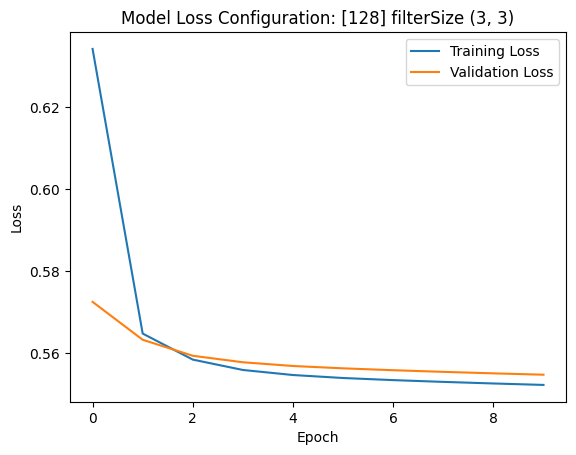

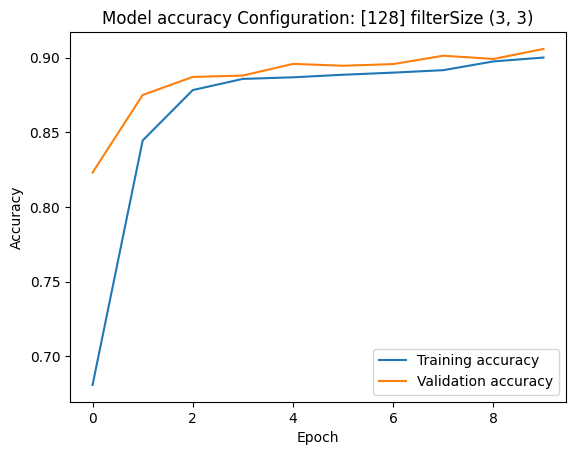

In [7]:
with tf.device('/cpu:0'):
    loss = history.history['loss']
    val_Loss = history.history['val_loss']
    plt.plot(loss, label='Training Loss')
    plt.plot(val_Loss, label='Validation Loss')
    plt.title(f"Model Loss Configuration: {hidden_layer_configs[0]} filterSize {filters[0]}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    Accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    plt.plot(Accuracy, label='Training accuracy')
    plt.plot(val_accuracy, label='Validation accuracy')
    plt.title(f"Model accuracy Configuration: {hidden_layer_configs[0]} filterSize {filters[0]}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


48/48 [==============================] - 4s 75ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5087125716113583..2.2269362853620303].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2945280855723384..2.7359609068821142].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6091079593181568..2.7868633690341227].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.652134554049642..2.2948062348980414].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5762888074871928..2.0037297768427225].


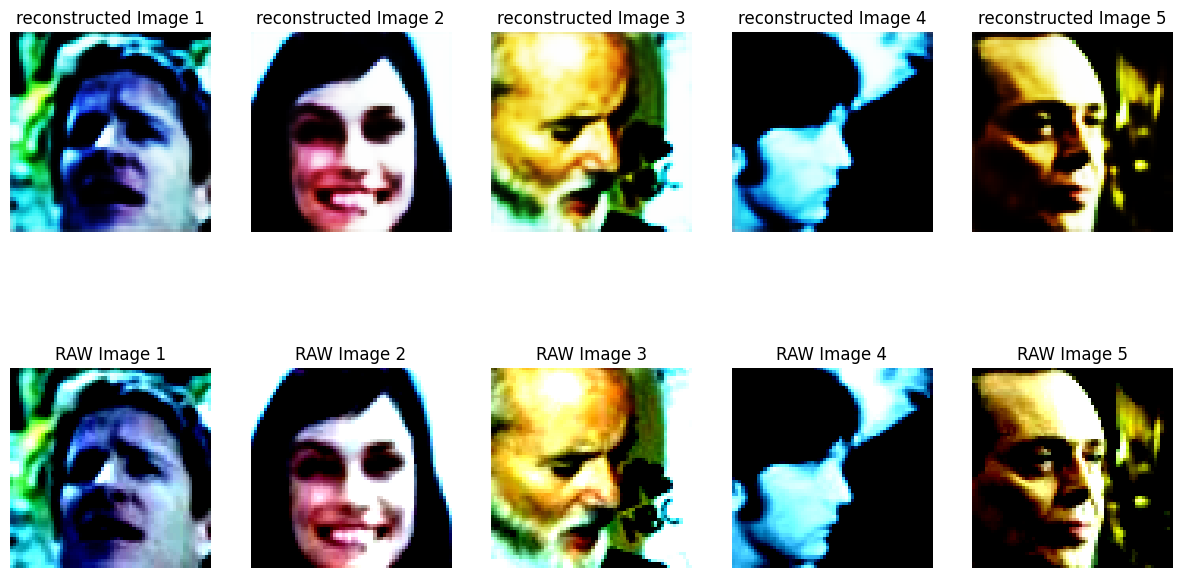

In [8]:
with tf.device('/cpu:0'):
    
    ss= autoencoder.predict(X_test)
    
    ss= ss.reshape(-1,64,64,3)
    # Plot 5 random images from the X array
    plt.figure(figsize=(15, 8))  
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(ss[i]) 
        plt.axis('off')  
        plt.title(f"reconstructed Image {i+1}")
        
        plt.subplot(2, 5, i+6)  
        plt.imshow(X_test[i]) 
        plt.axis('off')  
        plt.title(f"RAW Image {i+1}")
        
        
    
    
    plt.show()

In [9]:
#Accuracy
def accuracy(y_test1, y_pred1):
    y_pred1 = np.array(y_pred1)
    counter = 0
    for i in range(len(y_pred1)):
      if (y_pred1[i] == y_test1[i]):
        counter += 1
    accuracy = counter / len(y_pred1)
    accuracy *= 100
    return accuracy

from sklearn.metrics import confusion_matrix

# visualizing the results
def visualize_results(y_test,y_predict):

    cm = confusion_matrix(y_test, y_predict)

    # Calculate accuracy for each class
    class_accuracies = (cm.diagonal() / cm.sum(axis=1)) * 100
    array = np.arange(0, 100)
    # Plot the accuracies
    plt.figure(figsize=(15, 5))
    plt.bar(array, class_accuracies, color='skyblue')
    plt.xlabel("Classes")
    plt.ylabel("Accuracy (%)")
    plt.title("Class-Wise Accuracy")
    plt.xticks(rotation=90)
    plt.ylim(0, 100)  # Accuracy is in percentage
    plt.tight_layout()
    plt.show()

In [24]:
with tf.device('/cpu:0'):
    from sklearn.neighbors import KNeighborsClassifier
    feature_vector_test = encoder.predict(X_test)
    feature_vector_train =encoder.predict(X_train)




269/269 [==============================] - 6s 22ms/step


In [18]:
feature_vector_train.shape

(8583, 32, 32, 128)

In [25]:
feature_vector_test=feature_vector_test.reshape(-1,32*32*128)
feature_vector_train=feature_vector_train.reshape(-1,32*32*128)

In [26]:
with tf.device('/cpu:0'):   
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(feature_vector_train, Y_train)
    predictions = knn.predict(feature_vector_test)

22.31023102310231


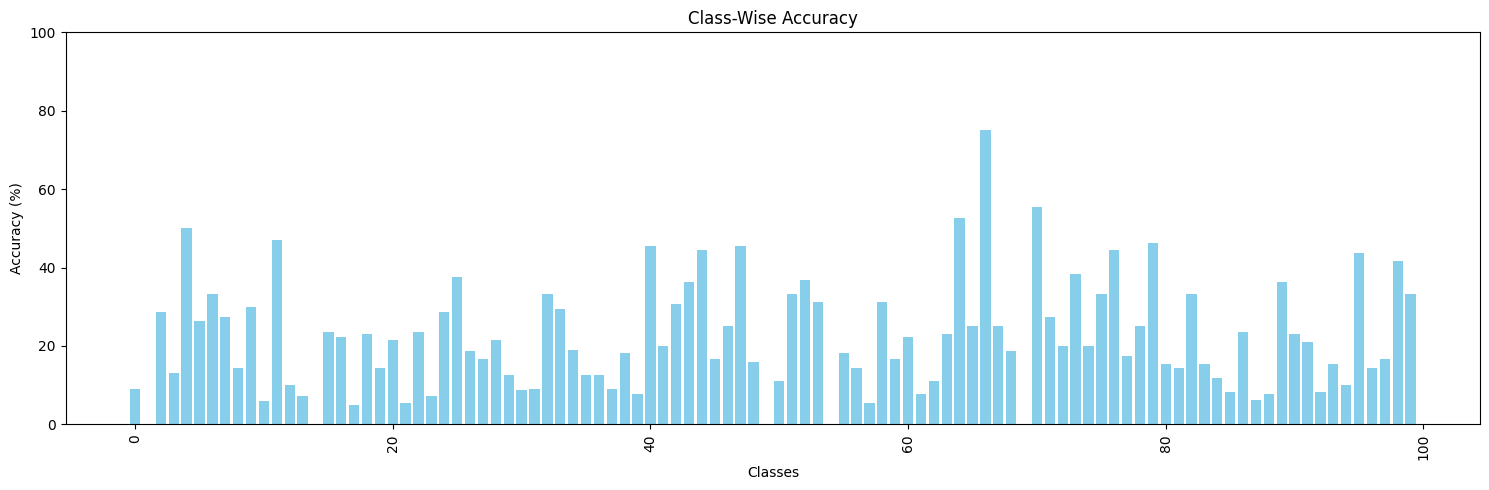

In [28]:
print(accuracy(Y_test, predictions))
visualize_results(Y_test,predictions)